<a href="https://colab.research.google.com/github/rasoco/master_data_science/blob/master/TFM/Machine%20Learning%20Models/Modeling_BiciMadProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BiciMad Project  - Master Data Science KSchool Ed.019



# Launch 

## Conect with GPU of Google 



In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('Encontrada GPU: {}'.format(device_name))

Encontrada GPU: /device:GPU:0


In [2]:
# !pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
drive

In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploration and cleaning Madrid Stations

###Load of the libraries


In [7]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium # To display maps with coordinates and markers.
import geopy # For geocoding and reverse geocoding.


### Load of the Madrid Stations dataset


In [14]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/originalbikestations.csv", sep=';', encoding='utf-8') #decimal is okey
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Número            216 non-null    object 
 1   Gis_X             216 non-null    object 
 2   Gis_Y             216 non-null    object 
 3   Fecha de Alta     216 non-null    object 
 4   Distrito          216 non-null    object 
 5   Barrio            216 non-null    object 
 6   Calle             216 non-null    object 
 7   Nº Finca          216 non-null    object 
 8   Tipo de Reserva   216 non-null    object 
 9   Número de Plazas  216 non-null    int64  
 10  Unnamed: 10       0 non-null      float64
 11  LONGITUD          216 non-null    float64
 12  LATITUD           216 non-null    float64
 13  DIRECCION         216 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 23.8+ KB


In [15]:
del df['Unnamed: 10']

In [16]:
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes'}) #change de name of column Número

In [17]:
df['ids'] = df['id'].str.rstrip('ampliacionb') #to get only number values
# df_stations = df_stations[onlycolumns]
df['ids'] = df['ids'].astype(int).sort_values() #change values ids and order


In [18]:
df['ids'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  26,  27,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

### Exploration of data


#### Grouping Distrito and show values unique and not unique of "id"

In [ ]:
df.groupby('Distrito')['ids']\
      .agg(['nunique', 'unique'])\
      .sort_values(by='nunique', ascending=False)

,nunique,unique
Distrito,,
01 CENTRO,57,"[1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, ..."
04 SALAMANCA,37,"[87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9..."
03 RETIRO,26,"[60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 7..."
07 CHAMBERÍ,24,"[3, 8, 111, 122, 123, 124, 125, 126, 127, 128,..."
02 ARGANZUELA,22,"[46, 47, 118, 119, 120, 121, 162, 163, 164, 16..."
05 CHAMARTÍN,18,"[136, 137, 139, 140, 146, 147, 148, 149, 150, ..."
06 TETUÁN,11,"[133, 151, 152, 153, 154, 155, 156, 204, 205, ..."
09 MONCLOA-ARAVACA,9,"[14, 110, 112, 113, 114, 115, 116, 117, 161]"
15 CIUDAD LINEAL,2,"[188, 189]"


In [ ]:
# df.groupby('OBJECTID')['OBJECTID'].agg(['nunique','unique'])
# df.groupby('Estación')['Estación'].agg(['unique'])

In [ ]:
def agrupation(b,c):
    # b = ""
    # c = ""
    a = df.groupby('b')['c'].agg(['nunique','unique'])
    print(a)


In [ ]:
# Name of values unique of Distrito
df['Distrito'].unique()

array(['01 \xa0CENTRO', '07 \xa0CHAMBERÍ', '09 \xa0MONCLOA-ARAVACA',
       '02 \xa0ARGANZUELA', '03 \xa0RETIRO', '04 \xa0SALAMANCA',
       '06 \xa0TETUÁN', '05 \xa0CHAMARTÍN', '13 \xa0PUENTE DE VALLECAS',
       '15 \xa0CIUDAD LINEAL'], dtype=object)

In [ ]:
# # Change the name of Distrito

# distrito_bike = ['01 CENTRO', '02 ARGANZUELA'. '03 RETIRO', '04 SALAMANCA', '05 CHAMARTÍN', '06 TETUÁN', '07 CHAMBERÍ', '09 MONCLOA - ARAVACA']
# df['distrito'] = df[distrito_bike]
# bikestations['WKT'] = bikestations[['X','Y']].apply(lambda x: ''.join(x), axis=1)
# # bikestations['p'] = df[['Year', 'quarter']].apply(lambda x: ''.join(x), axis=1)

# bikestations['WKT'] = bikestations.X.str.cat(bikestations.Y)

# import folium
# # from folium.plugins import MarkerCluster
# import pandas as pd
 
# SF_COORDINATES = (-3.701305, 40.418893)
# df
 
# # for speed purposes
# MAX_RECORDS = 170
  
# # create empty map zoomed in on San Francisco
# mapa = folium.Map(location=SF_COORDINATES, zoom_start=12)
# marker_cluster = folium.Marker().add_to(mapa) 

 
# # add a marker for every record in the filtered data, use a clustered view
# for each in df[0:MAX_RECORDS].iterrows():
#     folium.Marker(
#         location = [each[0]['Y'],each[0]['X']], 
#         clustered_marker = True).add_to(marker_cluster)
  
# display(mapa)

# for each in df[0:MAX_RECORDS].iterrows():
#   print(each[1,2])
#     # folium.Marker(
#     #     location = [each[0]['Y'],each[0]['X']], 
#     #     clustered_marker = True).add_to(marker_cluster)

# import folium
# from folium.plugins import MarkerCluster

# map1 = folium.Map(location=SF_COORDINATES, zoom_start=12)
# marker_cluster = MarkerCluster().add_to(map1) 

# for each in data[0:MAX_RECORDS].iterrows():
#     map1.Marker(location = [each[1]['Y'],each[1]['X']], 
#     clustered_marker = True).add_to(marker_cluster)

# display(map1)

# import requests 
# import os 
# def coord(c):
#     coor = re.compile(r'-?\d+\.\d{7}', c)
#     coords = [float(s) for s in coor]
#     return coords[::-1]

# bikestations['X'] = bikestations['X'].apply(coord)

# # filtramos solo las bicicleterías de palermo
# bici_centro = bikestations[bikestations.Distrito == '01 CENTRO'][['X', 'Y', 'Anclajes']]

#### Analysis of total Barrio per Distrito


In [ ]:
d_b = df.groupby(['Distrito'])['Barrio'].count()
d_b


Distrito
01  CENTRO                60
02  ARGANZUELA            22
03  RETIRO                27
04  SALAMANCA             38
05  CHAMARTÍN             18
06  TETUÁN                11
07  CHAMBERÍ              26
09  MONCLOA-ARAVACA       11
13  PUENTE DE VALLECAS     1
15  CIUDAD LINEAL          2
Name: Barrio, dtype: int64

#### Show graphic of the Bike Station by Distrito

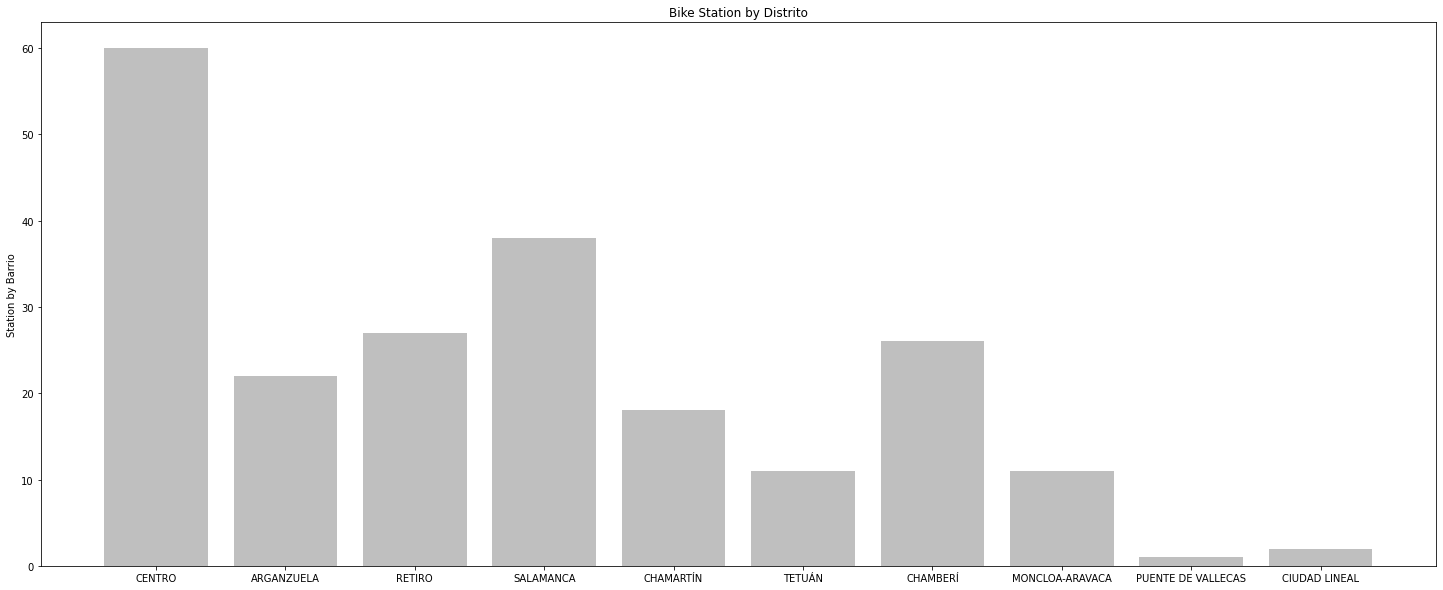

In [ ]:
import matplotlib.pyplot as plt
# fig = plt.figure()
# fig.add_axes(langs)
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'PUENTE DE VALLECAS', 'CIUDAD LINEAL']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_b, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
plt.ylabel('Station by Barrio')
plt.title('Bike Station by Distrito')

plt.show()

In [ ]:
df.groupby('Distrito')['Anclajes'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)

,count,sum,mean
Distrito,,,
01 CENTRO,60,1419,23.650000
04 SALAMANCA,38,906,23.842105
03 RETIRO,27,664,24.592593
07 CHAMBERÍ,26,584,22.461538
02 ARGANZUELA,22,541,24.590909
05 CHAMARTÍN,18,426,23.666667
06 TETUÁN,11,258,23.454545
09 MONCLOA-ARAVACA,11,243,22.090909
15 CIUDAD LINEAL,2,51,25.500000


#### Total Anclaje by Year

In [ ]:
df.groupby('Year')['Anclajes'].agg(['sum'])

,sum
Year,
2014,2872
2015,939
2016,24
2017,44
2018,15
2019,1147
2020,75


In [ ]:
df['Anclajes'].sum()

5116

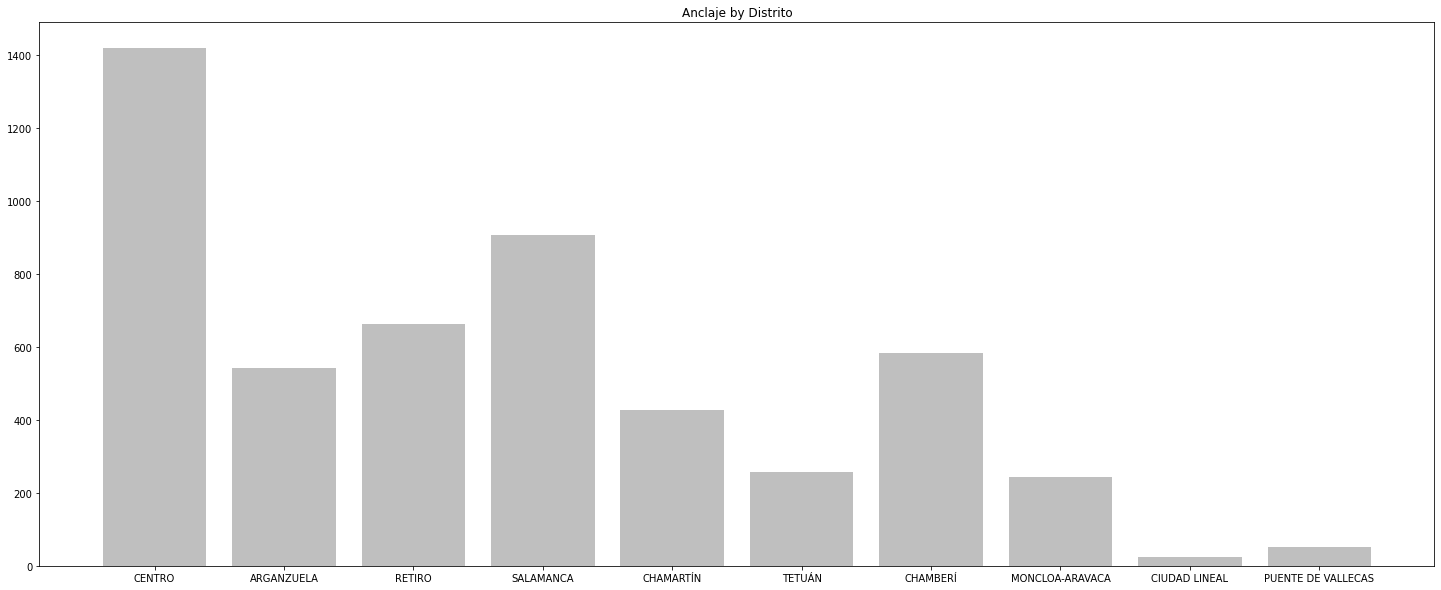

In [ ]:
d_a = df.groupby('Distrito')['Anclajes'].sum()
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'CIUDAD LINEAL', 'PUENTE DE VALLECAS']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_a, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
# plt.ylabel('Anclaje by Disti')
plt.title('Anclaje by Distrito')

plt.show()

In [ ]:
df.columns

Index(['id', 'Gis_X', 'Gis_Y', 'Fecha de Alta', 'Distrito', 'Barrio', 'Calle',
       'Nº Finca', 'Tipo de Reserva', 'Anclajes', 'LONGITUD', 'LATITUD',
       'DIRECCION', 'Year', 'ids'],
      dtype='object')

Text(0.5, 1.0, 'Total de Anclajes por Distrito y Año')

<Figure size 3600x10800 with 0 Axes>

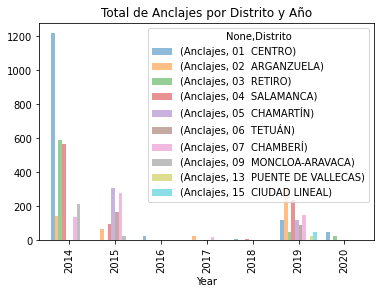

In [ ]:
year_distrito = df.groupby(['Year','Distrito']).agg({'Anclajes': 'sum'})
fig1=plt.figure()
# rect = l,b,w,h
# fig1.add_axes(rect, frameon=False, axisbg='g')
# fig1.add_axes([2014, 2015, 2016, 2017, 2018, 2019, 2020])
# fig1.subplots_adjust(wspace=0.9, hspace=0.9)
fig1.set_figheight(150)
fig1.set_figwidth(50)
fig.set_facecolor('white')
# plt.bar(align='center', alpha=0.5, width=0.8, color = 'gray')

year_distrito.unstack().plot.bar(align='center', alpha=0.5, width=0.8)
plt.title("Total de Anclajes por Distrito y Año")


In [ ]:
# plt.figure(figsize=[10,8])
# # x=d_a
# # x=d_b
# # n,bins,pat.hist([x,y])

# plt.hist([d_a,d_b])

In [ ]:
d_e = df.groupby('id')['Distrito'].sum()
d_e

id
001 a                01  CENTRO
001 b                01  CENTRO
020 ampliacion       01  CENTRO
025 a                01  CENTRO
025 b                01  CENTRO
                      ...      
95                04  SALAMANCA
96                04  SALAMANCA
97                04  SALAMANCA
98                04  SALAMANCA
99                04  SALAMANCA
Name: Distrito, Length: 216, dtype: object

### Maps

  #### Get of coordinates (Longitude and Latitude)








In [ ]:
locations = df[['LATITUD', 'LONGITUD']] # (Y, X)
locationlist = locations.values.tolist()
len(locationlist)
# locationlist 


216

In [ ]:
df['Locationlist'] = locationlist

#### Scatterplot of X, Y

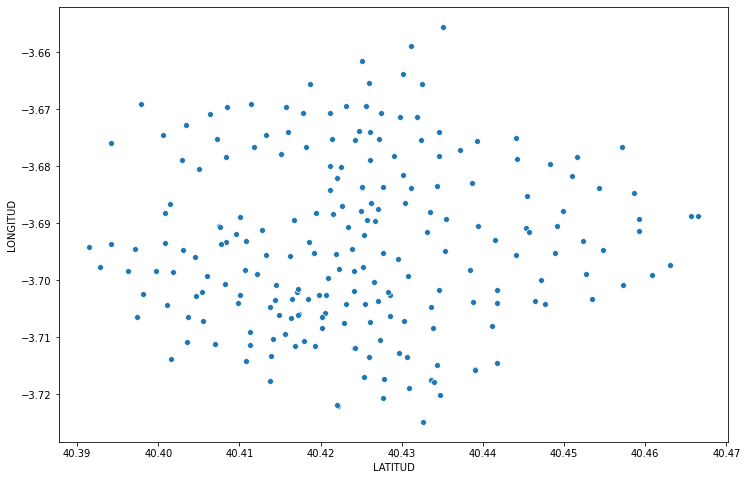

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(df['LATITUD'], df['LONGITUD'])

#### Testing of map

In [ ]:
import pandas as pd
import numpy as np
# import streamlit as st
import matplotlib.pyplot as plt
# import folium.plugins
# import plotly.express as px
from folium.plugins import MarkerCluster
# from bokeh.plotting import figure, output_file, show
# from streamlit_folium import folium_static

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/originalbikestations.csv", sep=';', encoding='utf-8')
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes'}) #change de name of column Número
df['ids'] = df['id'].str.rstrip('ampliacionb') #to get only number values
# df_stations = df_stations[onlycolumns]
df['ids'] = df['ids'].astype(int).sort_values() #change values ids and order

d_b = df.groupby(['Distrito'])['Barrio'].count()

locations = df[['LATITUD', 'LONGITUD']] # (Y, X)
locationlist = locations.values.tolist()
df['Locationlist'] = locationlist

map1 = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['id'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map1)
map1  

In [ ]:
df.columns

Index(['id', 'Gis_X', 'Gis_Y', 'Fecha de Alta', 'Distrito', 'Barrio', 'Calle',
       'Nº Finca', 'Tipo de Reserva', 'Anclajes', 'Unnamed: 10', 'LONGITUD',
       'LATITUD', 'DIRECCION', 'Year', 'ids', 'Locationlist'],
      dtype='object')

#### Display of bike map in Madrid

In [ ]:
map1 = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['id'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map1)
map1  

#### Display of BikeMadrid per Distrito

In [ ]:
import folium.plugins
folium.plugins.MarkerCluster()
map2 = folium.Map(location=[40.417110795315295, -3.70199802576925], tiles='Stamen Terrain', zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='green', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster)
map2

In [ ]:
import plotly.express as px
fig = px.scatter_geo(df, locations=df['Locationlist'], locationmode='country names', color= df['Distrito'].sort_values(), hover_name=df['Calle'],
                     size=df['Anclajes'], scope='europe', 
                     animation_frame=df['Year'].sort_values(), 
                     projection='stereographic')
# (df, locations="Locationlist", hover_name="Distrito", animation_frame="Year", projection="natural earth")
fig.show()

### Only Stations 2019

In [19]:
stations_2019 = df[df['Year'] <= 2019] #save the 2019 stations data for use to jan18
stations_2019['idunplug_station'] = stations_2019['ids']
stations_2019['idplug_station'] = stations_2019['ids']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Exploration and cleaning Jan18 Dataset

####Load of Libraries

In [20]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

####Acquiring data

In [21]:
downloaded = drive.CreateFile({'id':'1dBJtPkHMvyF5Pmeu-w8z-Y91smROB_6b'})
downloaded.GetContentFile('jan18.json')
# downloaded.GetContentFile('jan18_clean.json')

In [22]:
print(os.getcwd)

<built-in function getcwd>


#### Reading and Exploring data

In [23]:
jan18 = pd.read_json("jan18.json",encoding="utf-8", lines=True, dtype='frame')# open de file

In [24]:
# Save of position in _id column 
position = dict(enumerate(jan18['_id'].values))
position
type(position)
ids = []
# Save of values in its position 
ids = []
for d, v in position.items():
    ids += list(v.values())
#Save in the column _id
jan18['_id'] = ids 

In [25]:
na_columns = ['_id', 'user_day_code', 'idunplug_station', 'idunplug_base', 'idplug_station', 'idplug_base',
   'user_type','travel_time','unplug_hourTime', 'ageRange', 'zip_code']
jan18 = jan18[na_columns]
jan18 = jan18.rename(columns = {'_id':'id'})

# jan18.columns = ['_id', 'user_day_code', 'idunplug_base','idunplug_station','idplug_base', 'idplug_station',
#        'user_type','travel_time','unplug_hourTime', 'ageRange', 'zip_code']

In [ ]:
# jan18.to_csv('jan18_clean.csv') # to save the dataset

In [26]:
jan18 = jan18.drop(jan18[jan18.idplug_station == 2008].index) #deleting values 2008

## Unification processing Dataset (Jan18 and Stations_2019)

####Proceso Unificado

In [ ]:
new_dataset = pd.merge(jan18, stations_2019, on='idunplug_station')
new_dataset = new_dataset.rename(columns={'Gis_X':'Gis_Xidunplug',
       'Gis_Y':'Gis_Yidunplug', 'Fecha de Alta':'Fecha de Alta_idunplug', 'Distrito':'Distrito_idunplug', 'Barrio':'Barrio_idunplug', 'Calle':'Calle_idunplug', 'Nº Finca':'Nº Finca_idunplug',
        'Anclajes':'Anclajes_idunplug', 'Longitud':'Longitud_idunplug', 'Latitud':'Latitud_idunplug', 'DIRECCION':'DIRECCION_idunplug',
       'Year':'Year_idunplug', 'Locationlist':'Locationlist_idunplug', 'X':'X_idunplug', 'Y':'Y_idunplug'}) #change de name of the columns

del new_dataset['ids']
another_dataset = pd.merge(jan18,stations_2019, on = 'idplug_station')

another_dataset = another_dataset.rename(columns={'Gis_X':'Gis_Xidplug',
       'Gis_Y':'Gis_Yidplug', 'Fecha de Alta':'Fecha de Alta_idplug', 'Distrito':'Distrito_idplug', 'Barrio':'Barrio_idplug', 'Calle':'Calle_idplug', 'Nº Finca':'Nº Finca_idplug',
        'Anclajes':'Anclajes_idplug', 'Longitud':'Longitud_idplug', 'Latitud':'Latitud_idplug', 'DIRECCION':'DIRECCION_idplug',
       'Year':'Year_idplug', 'Locationlist':'Locationlist_idplug', 'X':'X_idplug', 'Y':'Y_idplug'})
del another_dataset['ids']

another_dataset.to_csv("another_dataset")
new_dataset.to_csv("new_dataset")# to save
new_dataset = pd.merge(jan18, stations_2019, on='idunplug_station') #join jan18 and stations_2019 using idunplug_station

join_data = pd.merge(new_dataset, another_dataset, on=['user_day_code'])

In [ ]:
# another_dataset = pd.merge(jan18,stations_2019, on = 'idplug_station', indicator=True, how='left') #que tipo de merge hace en cada fila 
another_dataset.head(2)

,id_x,user_day_code,idunplug_station_x,idunplug_base,idplug_station,idplug_base,user_type,travel_time,unplug_hourTime,ageRange,zip_code,id_y,Gis_Xidplug,Gis_Yidplug,Fecha de Alta_idplug,Distrito_idplug,Barrio_idplug,Calle_idplug,Nº Finca_idplug,Tipo de Reserva,Anclajes_idplug,LONGITUD,LATITUD,DIRECCION_idplug,Year_idplug,idunplug_station_y
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,14,7,1,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.69774,40.425216,"CALLE DE HORTALEZA, 75",2014,7
1,5a505acf2f384319304ed839,9ff0154193786639eb616b117c1074bcdd2f3c816bd2e4...,166,8,7,10,1,1794,{'$date': '2018-01-01T01:00:00.000+0100'},0,,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.69774,40.425216,"CALLE DE HORTALEZA, 75",2014,7


##**Exploration unified data of Jan18 and Stations 2019**

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

### Acquiring data

In [27]:
data = pd.read_json("/content/drive/My Drive/Colab Notebooks/data/join_data", encoding="utf-8", dtype="frame")

In [28]:
# Cleaning columns 
# data.columns
data = data.rename(columns={'id_x_x': '_id','idplug_station_x':'idplug_station',
       'user_type_x':'user_type', 'travel_time_x':'travel_time',
       'unplug_hourTime_x':'unplug_hourTime', 'ageRange_x':'ageRange', 'zip_code_x':'zip_code'})

###Manipulating data with time variable

In [29]:
data['travel_minutes'] = data['travel_time'] / 60
data['travel_minutes']

0           4.733333
1          13.733333
2          13.733333
3           5.616667
4           5.616667
             ...    
2926624     5.216667
2926625     3.750000
2926626    11.400000
2926627     2.683333
2926628     2.900000
Name: travel_minutes, Length: 2926629, dtype: float64

### Zip Code

In [30]:
# DATA CLEANING ZIP CODE
import re
data['zip_code'].unique()
df_1 = data[data.zip_code.astype(str).str.contains(re.compile('\d{5}'))] #CLEANING THE DATA ZIP CODE
df_1.shape

(768832, 18)

### Distance Calculate using Haversine

In [31]:
#Calculate KMs 
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(data):
  lon1 = data['Longitud_idunplug']
  lat1 = data['Latitud_idunplug']
  lon2 = data['Longitud_idplug']
  lat2 = data['Latitud_idplug']
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) #change a radians
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * arcsin(sqrt(a))
  km = 6367 * c # Tierra es una esfera perfecta de radio RT = 6367
  return km 
# data['distance'] = data.apply(lambda data: haversine(data), axis=1

In [32]:
data['distance'] = data.apply(lambda data: haversine(data), axis=1)

### Slope Calculate 


In [33]:
lon1 = data['Longitud_idunplug']
lat1 = data['Latitud_idunplug']
lon2 = data['Longitud_idplug']
lat2 = data['Latitud_idplug']
m = ""
slope = ""

if slope == 0:
  m = 0
else: 
  lat_dif = lat2-lat1
  lon_dif = lon2-lon1
  m = (lat_dif/lon_dif) * 100
data['slope'] = m

### Deleting Nan

In [34]:
data.isnull().sum()

_id                       0
user_day_code             0
idunplug_station          0
Distrito_idunplug         0
Barrio_idunplug           0
Longitud_idunplug         0
Latitud_idunplug          0
idplug_station            0
Distrito_idplug           0
Barrio_idplug             0
Longitud_idplug           0
Latitud_idplug            0
user_type                 0
travel_time               0
unplug_hourTime           0
ageRange                  0
zip_code                  0
travel_minutes            0
distance                  0
slope                256755
dtype: int64

In [35]:
data = data.dropna()

### Broke or not

In [36]:
broke_dict = {3:1, 2:0, 1:0}
data['broke'] = data.user_type.map(broke_dict)

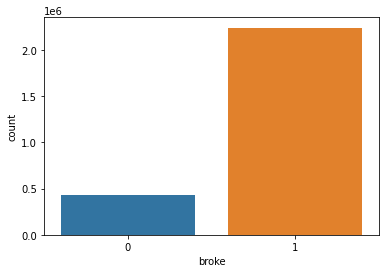

In [37]:
jan18_broke = sns.countplot(x='broke', data=data)

### Travel per user_day_code

In [38]:
data_user = data.groupby('user_day_code').count()

In [39]:
data['count_travel'] = 0
data_user_groupby_count = data[['user_day_code', 'count_travel']].groupby('user_day_code').count()
data_user_groupby_count= data_user_groupby_count.reset_index()
data_user_groupby_count
# data = pd.merge(data, data_user_groupby_count, on="user_day_code", how="left", indicator=True)

,user_day_code,count_travel
0,000049d964247d294a64274532f52cf30aec52d35d3f6e...,1
1,00017e5896aa97dc6eea1186ff153d5945a802f9bbb1f9...,1
2,0001a94af1655cf8f07a711ef61f802c995d9233309af9...,1
3,0001aebede7ee7412931a3f2b5cfd139048610c9788023...,1
4,0001d7326dbe135189999a728480bfe2a0752a86b3ec8d...,7
...,...,...
137436,fffea123463d1b4efd66a60e5933badc2523867eff2631...,1
137437,fffeace3ed193b043935e49911d6a0bbd5c5c1149d96ad...,1
137438,fffeca160c8d97895a6a3fe386f85c3f98d5381742ee78...,3
137439,ffff105c72d94f00144297001b3f6cd0c68671b434ec89...,3


In [40]:
data = pd.merge(data, data_user_groupby_count, on="user_day_code", how="left")

In [41]:
data = data.rename(columns={"count_travel_y":"count_travel"})
data = data.drop(['count_travel_x'], axis=1)


# **Machine Learning Models**

##### Logistic Regression ML (1)

This is Logistic Regression with split test and train. The total observations is 2926629 and 22 columns.

Objective variable: user_type

Feautures: travel_minutes, distance, count_travel

                precision    recall  f1-score   support

           1       0.98      1.00      0.99    160080
           2       0.00      0.00      0.00      1874
           3       1.00      1.00      1.00    716035

Este modelo trata de predecir el tipo de usuario en función de las variables distancia, tiempo minutos, edad y total de viajes. Tiene una buena precisión global de 0.99.
No obstante, no tiene buena Precisión, Recall ni f1-score cuando tiene que predecir en el perfil 2.



In [43]:
data.shape

(2669874, 22)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y1 = data['user_type'] 
x1 = data.loc[:,['travel_minutes', 'distance', 'count_travel']] 
class_names = y1.sort_values().unique()
# x1_train, y1_train, x1_test, y1_test = train_test_split(x1,y1, test_size=0.3, random_state=0) #error por el orden de la partición

In [45]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=0)

In [46]:
model1 = LogisticRegression(multi_class='ovr')
model1.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
model1.coef_

array([[-0.00632875,  0.02795974, -0.01929619],
       [ 0.00033084, -0.13246684, -0.00918624],
       [ 0.00277694,  0.03542213,  0.02440381]])

In [48]:
model1.intercept_

array([ 4.28353307, -4.06495695, -5.42006015])

In [49]:
model1.score(x1_train, y1_train)

0.9954208627377119

Accuracy_score: Mide la precisión global del modelo, en este caso es buena de un 0.99. No obstante la precisión, recall y f1-score para el tipo de usuario 2 no es buena.

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, model1.predict(x1_test))

0.9955079073565196

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, model1.predict(x1_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.98      1.00      0.99    126705
           2       0.00      0.00      0.00      1519
           3       1.00      1.00      1.00    672739

    accuracy                           1.00    800963
   macro avg       0.66      0.66      0.66    800963
weighted avg       0.99      1.00      0.99    800963




En el **reporte de clasificación** podemos observar que para los usuarios anuales (1) tiene un *recall* 1.00 lo cual significa que encuentra el total de elementos de esta clase lo mismo ocurre con el grupo 3, los trabajadores de BiciMad. Mientras que para los usuarios ocasionales no encuentra el total de elementos.

En cuanto la *precisión*, es decir clasificar correctamente la clase, son altas en las clasificación del grupo 1 y 3. 

En cuanto *F1-Score*, es la armonia entre la precisión y recall, es bastante bueno para los grupos 1 y 3. 

El *support* es el número de muestras de la respuesta verdadera que se encuentran en esa clase.

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y1_test, model1.predict(x1_test))

array([[126232,      0,    473],
       [  1519,      0,      0],
       [  1606,      0, 671133]])

Confusion matrix, without normalization
[[126232      0    473]
 [  1519      0      0]
 [  1606      0 671133]]
Normalized confusion matrix
[[0.99626692 0.         0.00373308]
 [1.         0.         0.        ]
 [0.00238726 0.         0.99761274]]


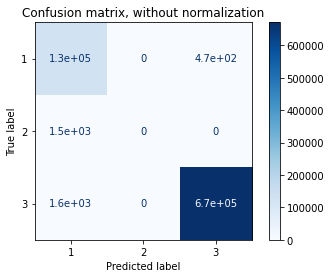

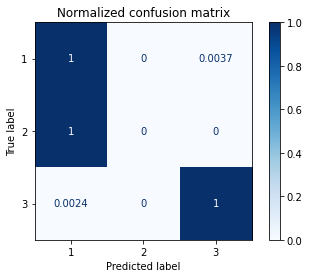

In [53]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model1, x1_test, y1_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)

    print(disp.confusion_matrix)

#### Logistic Regression ML (2)

This is Logistic Regression with split test and train. The total observations is 2926629 and 22 columns.

Objective variable: user_type

Feautures: distance, travel_minutes, ageRange, count_travel

                precision    recall  f1-score   support

           1       0.98      1.00      0.99    374466
           2       0.00      0.00      0.00      4450
           3       1.00      1.00      1.00   1669724

Este modelo trata de predecir el tipo de usuario en función de las variables distancia, tiempo minutos, edad y total de viajes. Tiene una buena precisión global de 1.00. No obstante, no tiene buena Precisión, Recall ni f1-score cuando tiene que predecir en el perfil 2.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y2 = data['user_type'] #objective
x2 = data.loc[:,['distance', 'travel_minutes', 'ageRange', 'count_travel']] # feautures

In [55]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=0) #split data

In [56]:
model2 = LogisticRegression() #creating a model2
model2.fit(x2_train, y2_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
model2.coef_

array([[-2.26438694e-03, -3.78950792e-03,  5.49018831e-01,
        -4.77464733e-03],
       [ 1.17092573e-01,  1.30854742e-03, -1.38276160e+00,
        -1.49704702e-02],
       [-1.14828186e-01,  2.48096050e-03,  8.33742764e-01,
         1.97451174e-02]])

In [58]:
model2.intercept_

array([ 3.16995932, -0.61237794, -2.55758138])

In [59]:
model2.score(x2_train,y2_train)

0.9957782901379466

In [60]:
# y2_pred = model2.predict(x2_test)
# confusion_matrix(y2_test, y2_pred)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y2_train, model2.predict(x2_train)))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99    295068
           2       0.00      0.00      0.00      3484
           3       1.00      1.00      1.00   1570359

    accuracy                           1.00   1868911
   macro avg       0.66      0.66      0.66   1868911
weighted avg       0.99      1.00      0.99   1868911



Confusion matrix, without normalization
[[126304      0    401]
 [  1519      0      0]
 [  1390      2 671347]]
Normalized confusion matrix
[[9.96835168e-01 0.00000000e+00 3.16483170e-03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.06618020e-03 2.97292115e-06 9.97930847e-01]]


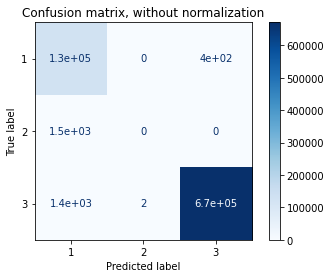

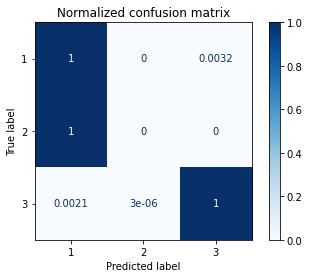

In [62]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model2, x2_test, y2_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)

    print(disp.confusion_matrix)

### Logistic Regression ML (3)

This is Logistic Regression with split test and train. The sample is balanced, the total observations is 18972 and 22 columns.

Objective variable: user_type

Feautures: travel_minutes, distance, count_travel

Este modelo trata de predecir el tipo de usuario en función de la variable tiempo en minutos, distancia y total de viajes. Tiene una buena precisión de 0.79. 

              precision    recall  f1-score   support

           1       0.65      0.87      0.74      4487
           2       0.80      0.52      0.63      4397
           3       1.00      1.00      1.00      4396


Este modelo trata de predecir el tipo de usuario en función de las variables  tiempo minutos, distancia y total de viajes.  No obstante, no tiene buena Recall ni f1-score cuando tiene que predecir en el perfil 2.
          


In [66]:
balanced_data=data.groupby('user_type',as_index = False,group_keys=False).apply(lambda s: s.sample(6324,replace=True)) #to balance data

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y3 = balanced_data['user_type']
x3 = balanced_data.loc[:,['travel_minutes', 'distance', 'count_travel']]

In [68]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30, random_state=0) #split data

In [69]:
model3 = LogisticRegression()
model3.fit(x3_train,y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
model3.score(x3_train,y3_train)

0.7945783132530121

In [71]:
model3.score(x3_test, y3_test)

0.7946240337315531

In [72]:
y3_pred = model3.predict(x3_test)
confusion_matrix(y3_test, y3_pred)

array([[1577,  259,    1],
       [ 899, 1028,    0],
       [   8,    2, 1918]])

In [73]:
print(classification_report(y3_train, model3.predict(x3_train)))

              precision    recall  f1-score   support

           1       0.65      0.86      0.74      4487
           2       0.79      0.53      0.63      4397
           3       1.00      0.99      1.00      4396

    accuracy                           0.79     13280
   macro avg       0.81      0.79      0.79     13280
weighted avg       0.81      0.79      0.79     13280



Accuracy_score: Mide la precisión global del modelo, en este caso es buena de un 0.80

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y3_test, model3.predict(x3_test))

0.7946240337315531

Confusion matrix, without normalization
[[1577  259    1]
 [ 899 1028    0]
 [   8    2 1918]]
Normalized confusion matrix
[[8.58464888e-01 1.40990746e-01 5.44365814e-04]
 [4.66528282e-01 5.33471718e-01 0.00000000e+00]
 [4.14937759e-03 1.03734440e-03 9.94813278e-01]]


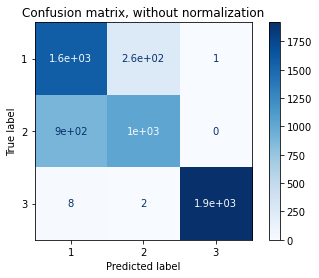

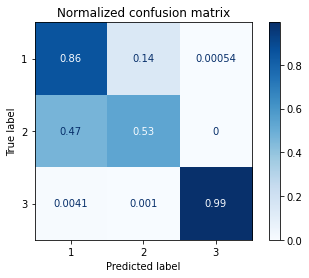

In [75]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model3, x3_test, y3_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)

    print(disp.confusion_matrix)

Diagonal principal evaluaciones correctas de cada una de las clases, Verdaderos Positivos. 



### **Logistic Regression ML (4)**
This is Logistic Regression with split test and train. The sample is balanced. The sample is balanced, the total observations is 18972 and 22 columns.

Objective variable: user_type

Feautures: distance, travel_minutes, ageRange, count_travel

Este modelo trata de predecir el tipo de usuario en función de las variables distancia, tiempo minutos, edad y total de viajes. Tiene una buena precisión global de 0.88. 

                precision    recall  f1-score   support

           1       0.95      0.70      0.81      4487
           2       0.76      0.97      0.85      4397
           3       1.00      0.99      1.00      4396



Este modelo trata de predecir el tipo de usuario en función de las variables tiempo minutos, distancia y total de viajes. La Precisión, Recall y f1-score mejora para las tres clases.       


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y4 = balanced_data['user_type'] #objective
x4 = balanced_data.loc[:,['distance', 'travel_minutes', 'ageRange', 'count_travel']] 

In [77]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.30, random_state=0) #split data

In [78]:
model4 = LogisticRegression() #creating a model2
model4.fit(x4_train, y4_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
model4.score(x4_train,y4_train)

0.8887801204819277

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y4_train, model4.predict(x4_train)))

              precision    recall  f1-score   support

           1       0.95      0.71      0.81      4487
           2       0.77      0.97      0.86      4397
           3       1.00      0.99      0.99      4396

    accuracy                           0.89     13280
   macro avg       0.90      0.89      0.89     13280
weighted avg       0.90      0.89      0.89     13280



Confusion matrix, without normalization
[[1308  523    6]
 [  48 1878    1]
 [   7    1 1920]]
Normalized confusion matrix
[[7.12030484e-01 2.84703321e-01 3.26619488e-03]
 [2.49091853e-02 9.74571873e-01 5.18941360e-04]
 [3.63070539e-03 5.18672199e-04 9.95850622e-01]]


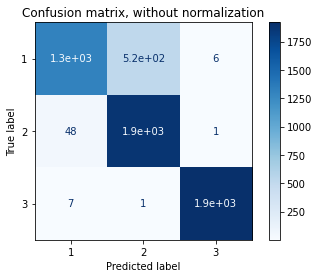

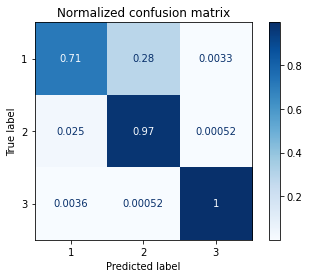

In [81]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model4, x4_test, y4_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)

    print(disp.confusion_matrix)

### K Nearest Neighbor Classifier (5)

This is K Nearest Neighbor Classifier with split test and train. The total observations is 2926629 and 22 columns.

Objective variable: user_type

Feautures: travel_minutes, distance, count_travel


                precision    recall  f1-score   support

           1       0.99      1.00      0.99    160080
           2       0.35      0.15      0.21      1874
           3       1.00      1.00      1.00    716035

Este modelo trata de predecir el tipo de usuario en función de las variables  tiempo minutos, distancia, y total de viajes. Tiene una buena precisión global de 0.99. No obstante, no tiene buena Precisión, Recall ni f1-score cuando tiene que predecir en el perfil 2.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
y5 = data['user_type'] 
x5 = data.loc[:,['travel_minutes', 'distance', 'count_travel']] 
class_names = y5.sort_values().unique()

In [83]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.30, random_state=0)

In [84]:
model5 = KNeighborsClassifier(n_neighbors=3) #create model

In [85]:
model5.fit(x5_train, y5_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [86]:
pred5 = model5.predict(x5_test) #predict values 

In [87]:
model5.score(x5_train, y5_train)

0.9986735590940392

In [88]:
model5.score(x5_test, y5_test)

0.9977826691120564

In [89]:
confusion_matrix(y5_test, pred5)

array([[126260,    413,     32],
       [  1246,    273,      0],
       [    83,      2, 672654]])

In [90]:
print(classification_report(y5_test, pred5))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    126705
           2       0.40      0.18      0.25      1519
           3       1.00      1.00      1.00    672739

    accuracy                           1.00    800963
   macro avg       0.80      0.73      0.75    800963
weighted avg       1.00      1.00      1.00    800963



### K Nearest Neighbor Classifier (6)

This is K Nearest Neighbor Classifier with split test and train. The total observations is 2926629 and 22 columns.

Objective variable: user_type

Feautures: distance, travel_minutes, ageRange, count_travel


                precision    recall  f1-score   support

           1       0.99      1.00      0.99    160080
           2       0.40      0.23      0.29      1874
           3       1.00      1.00      1.00    716035

Este modelo trata de predecir el tipo de usuario en función de las variables tiempo minutos, distancia, y total de viajes. Tiene una buena precisión global de 0.99. No obstante, no tiene buena Precisión, Recall ni f1-score cuando tiene que predecir en el perfil 2. 

In [91]:
from sklearn.neighbors import KNeighborsClassifier
y6 = data['user_type'] 
x6 = data.loc[:,['distance','travel_minutes', 'ageRange','count_travel']] 
class_names = y5.sort_values().unique()

In [92]:
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.30, random_state=0)

In [93]:
model6 = KNeighborsClassifier(n_neighbors=3) #create model

In [94]:
model6.fit(x6_train, y6_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [95]:
pred6 = model6.predict(x6_test) #predict values 

In [96]:
model6.score(x6_train, y6_train)

0.9988217737495257

In [97]:
model6.score(x6_test, y6_test)

0.9978613244307165

In [98]:
confusion_matrix(y6_test, pred6)

array([[126174,    504,     27],
       [  1123,    396,      0],
       [    58,      1, 672680]])

In [99]:
print(classification_report(y6_test, pred6))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    126705
           2       0.44      0.26      0.33      1519
           3       1.00      1.00      1.00    672739

    accuracy                           1.00    800963
   macro avg       0.81      0.75      0.77    800963
weighted avg       1.00      1.00      1.00    800963



Confusion matrix, without normalization
[[126174    504     27]
 [  1123    396      0]
 [    58      1 672680]]
Normalized confusion matrix
[[9.95809163e-01 3.97774358e-03 2.13093406e-04]
 [7.39302172e-01 2.60697828e-01 0.00000000e+00]
 [8.62147133e-05 1.48646057e-06 9.99912299e-01]]


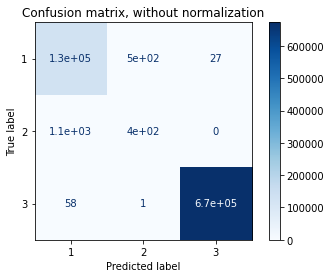

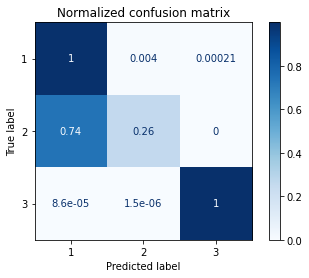

In [100]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model6, x6_test, y6_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)

    print(disp.confusion_matrix)

### K Nearest Neighbor Classifier (7)

This is K Nearest Neighbor Classifier with split test and train. The sample is balanced. The sample is balanced, the total observations is 18972 and 22 columns.

Objective variable: user_type

Feautures: travel_minutes, distance, count_travel


                precision    recall  f1-score   support

           1       0.78      0.72      0.75      1837
           2       0.75      0.81      0.78      1927
           3       1.00      1.00      1.00      1928

  Este modelo trata de predecir el tipo de usuario en función de las variables tiempo minutos, distancia, y total de viajes. Tiene una buena precisión global de 0.91. En general tiene buena Precisión, Recall y f1-score.

In [101]:
from sklearn.neighbors import KNeighborsClassifier
y7 = balanced_data['user_type'] 
x7 = balanced_data.loc[:,['travel_minutes', 'distance', 'count_travel']] 
class_names = y7.sort_values().unique()

In [102]:
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.30, random_state=0)

In [103]:
model7 = KNeighborsClassifier(n_neighbors=3) #create model

In [104]:
model7.fit(x7_train, y7_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [105]:
pred7 = model7.predict(x7_test) #predict values 

In [106]:
model7.score(x7_train, y7_train)

0.923117469879518

In [107]:
model7.score(x7_test, y7_test)

0.8504919184820802

In [108]:
confusion_matrix(y7_test, pred7)

array([[1319,  514,    4],
       [ 327, 1600,    0],
       [   6,    0, 1922]])

In [109]:
print(classification_report(y7_test, pred7))

              precision    recall  f1-score   support

           1       0.80      0.72      0.76      1837
           2       0.76      0.83      0.79      1927
           3       1.00      1.00      1.00      1928

    accuracy                           0.85      5692
   macro avg       0.85      0.85      0.85      5692
weighted avg       0.85      0.85      0.85      5692



Confusion matrix, without normalization
[[1319  514    4]
 [ 327 1600    0]
 [   6    0 1922]]
Normalized confusion matrix
[[0.71801851 0.27980403 0.00217746]
 [0.16969382 0.83030618 0.        ]
 [0.00311203 0.         0.99688797]]


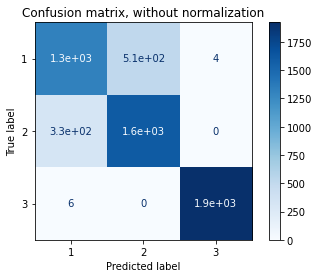

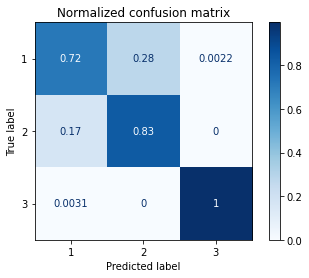

In [110]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model7, x7_test, y7_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)

    print(disp.confusion_matrix)

### **K Nearest Neighbor Classifier (8**)

This is K Nearest Neighbor Classifier with split test and train.  The sample is balanced. The sample is balanced, the total observations is 18972 and 22 columns.

Objective variable: user_type

Feautures: distance, travel_minutes, ageRange, count_travel

                precision    recall  f1-score   support

           1       0.89      0.80      0.84      1837
           2       0.83      0.90      0.86      1927
           3       1.00      1.00      1.00      1928
  
Este modelo trata de predecir el tipo de usuario en función de las variables tiempo minutos, distancia, y total de viajes. Tiene una buena precisión global de 0.94. En comparación con el modelo anterior, mejora considerablementela Precisión, Recall y f1-score en las tres clases. 
               

In [111]:
from sklearn.neighbors import KNeighborsClassifier
y8 = balanced_data['user_type'] 
x8 = balanced_data.loc[:,['distance','travel_minutes', 'ageRange','count_travel']] 
class_names = y8.sort_values().unique()

In [112]:
x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, test_size=0.30, random_state=0)

In [113]:
model8 = KNeighborsClassifier(n_neighbors=3) #create model

In [114]:
model8.fit(x8_train, y8_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [115]:
pred8 = model8.predict(x8_test) #predict values 

In [116]:
model8.score(x8_train, y8_train)

0.9503765060240964

In [117]:
model8.score(x8_test, y8_test)

0.9093464511595222

In [118]:
confusion_matrix(y8_test, pred8)

array([[1477,  357,    3],
       [ 150, 1777,    0],
       [   6,    0, 1922]])

In [119]:
print(classification_report(y8_test, pred8))

              precision    recall  f1-score   support

           1       0.90      0.80      0.85      1837
           2       0.83      0.92      0.88      1927
           3       1.00      1.00      1.00      1928

    accuracy                           0.91      5692
   macro avg       0.91      0.91      0.91      5692
weighted avg       0.91      0.91      0.91      5692



Confusion matrix, without normalization
[[1477  357    3]
 [ 150 1777    0]
 [   6    0 1922]]
Normalized confusion matrix
[[0.80402831 0.1943386  0.0016331 ]
 [0.0778412  0.9221588  0.        ]
 [0.00311203 0.         0.99688797]]


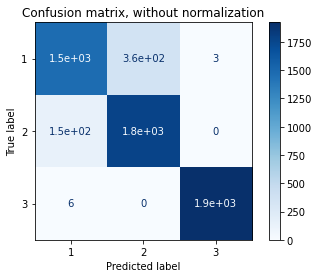

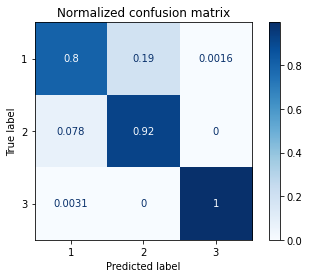

In [120]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model8, x8_test, y8_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)

    print(disp.confusion_matrix)